In [6]:
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
import yfinance as yf
df = yf.download("AMZN", start="2019-01-01", end="2020-01-01",group_by="ticker") 

[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,75.540001,76.038002,74.349998,75.098503,75.098503,139090000
2019-01-02,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07,80.115501,81.727997,79.459503,81.475502,81.475502,159864000


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,89.690498,89.778503,89.378998,89.460503,89.460503,17626000
2019-12-26,90.050499,93.523003,89.974998,93.438499,93.438499,120108000
2019-12-27,94.146004,95.070000,93.300499,93.489998,93.489998,123732000
2019-12-30,93.699997,94.199997,92.030998,92.344498,92.344498,73494000
2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,89.382379,90.073806,88.599320,89.402698,89.402698,7.759720e+07
std,5.210206,5.094606,5.220710,5.135608,5.135608,3.245018e+07
min,73.260002,76.038002,73.046501,75.014000,75.014000,1.762600e+07
25%,86.581497,87.343498,85.762497,86.782501,86.782501,5.562400e+07
50%,89.413002,89.910004,88.667999,89.320000,89.320000,6.966800e+07
75%,92.419998,93.389000,91.777000,92.765999,92.765999,9.280800e+07
max,101.280998,101.790001,100.193497,101.049500,101.049500,2.301240e+08


In [13]:
X = df[['High','Low','Open','Volume']].values
y = df['Close'].values
print(X)

[[7.60380020e+01 7.43499985e+01 7.55400009e+01 1.39090000e+08]
 [7.76679993e+01 7.30465012e+01 7.32600021e+01 1.59662000e+08]
 [7.69000015e+01 7.48554993e+01 7.60005035e+01 1.39512000e+08]
 ...
 [9.50699997e+01 9.33004990e+01 9.41460037e+01 1.23732000e+08]
 [9.41999969e+01 9.20309982e+01 9.36999969e+01 7.34940000e+07]
 [9.26630020e+01 9.16115036e+01 9.20999985e+01 5.01300000e+07]]


In [14]:
print(y)

[ 75.09850311  76.95649719  75.01399994  78.76950073  81.47550201
  82.82900238  82.97100067  82.81099701  82.02799988  80.86049652
  83.72799683  84.18900299  84.66100311  84.80999756  81.60849762
  82.00099945  82.74649811  83.52850342  81.89450073  79.69400024
  83.52149963  85.93650055  81.31150055  81.66549683  82.94049835
  82.01300049  80.71849823  79.41100311  79.55000305  81.90049744
  82.          81.13249969  80.39749908  81.3789978   81.10500336
  80.97200012  81.57800293  81.65000153  81.81999969  82.05449677
  81.99150085  83.58650208  84.8085022   84.62149811  83.44750214
  81.29750061  81.04000092  83.53099823  83.65499878  84.54049683
  84.31099701  85.61799622  87.10749817  88.09249878  89.8635025
  90.96299744  88.2385025   88.71299744  89.18800354  88.28500366
  88.67099762  89.03749847  90.70950317  90.6989975   91.03500366
  90.94300079  91.86399841  92.49299622  91.79199982  92.36650085
  92.20349884  92.15299988  92.24349976  93.15200043  93.24099731
  93.084503

In [15]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [16]:
#from sklearn.linear_model import LinearRegression
# Create Regression Model 
Model = LinearRegression()

# Train the model
Model.fit(X_train, y_train)
#Printing Coefficient
print(Model.coef_)

# Use model to make predictions
predicted = Model.predict(X_test) 
print(predicted)

[ 9.65397204e-01  6.23993174e-01 -5.86139263e-01 -2.07860052e-09]
[92.06909114 92.23372957 90.60602005 89.39377088 91.48858503 86.8148683
 89.44261775 90.98841064 91.42253502 80.89083195 89.3059111  93.78262147
 85.6537801  87.06997931 89.10876798 95.49889068 87.68424332 85.26745115
 78.54714985 93.22629346 86.93789061 80.94373152 94.50441686 86.2091758
 94.91534282 90.93599429 93.09863955 92.43188144 81.52122944 88.9606077
 91.72489574 83.82986673 90.52972589 88.92986419 91.23548651 94.25912681
 81.49239398 81.08906638 81.09303257 90.01728675 95.34240594 80.12431542
 93.28850502 90.81996794 81.43616789 89.17300015 80.39896496 84.66273649
 81.50757065 74.93449215 89.62980249 97.53908944 89.31884799 88.56934938
 91.25744656 95.86238055 95.39711121 79.80489261 82.34168192 89.36872437
 89.58548944 88.01652084 91.84743305 85.57645293 83.33417336 88.00316686
 82.35544156 89.76454733 90.60778816 91.88340861 94.49292625 88.87533843
 92.002759   95.36871094 93.50751573 87.9795711 ]


In [17]:
y_test

array([92.49299622, 92.39199829, 90.23300171, 89.53299713, 91.13400269,
       86.73549652, 89.18800354, 91.12750244, 91.07499695, 81.47550201,
       89.61399841, 93.03150177, 86.47799683, 86.78250122, 88.90000153,
       95.08750153, 88.41649628, 85.61799622, 79.41100311, 93.15200043,
       87.28600311, 81.10500336, 93.44999695, 86.27249908, 94.89150238,
       90.92549896, 93.43849945, 92.17749786, 81.81999969, 89.29399872,
       92.03600311, 83.44750214, 90.70950317, 88.99949646, 91.17700195,
       93.48999786, 82.05449677, 81.13249969, 81.89450073, 89.70800018,
       95.21399689, 79.69400024, 93.55750275, 90.95950317, 81.3789978 ,
       89.26499939, 80.97200012, 84.18900299, 81.90049744, 75.09850311,
       89.84700012, 98.1230011 , 89.2460022 , 88.3690033 , 91.64450073,
       95.56500244, 95.69499969, 79.55000305, 82.74649811, 89.37400055,
       89.31999969, 88.46050262, 91.56749725, 85.66149902, 83.53099823,
       88.04699707, 81.99150085, 89.49199677, 90.04000092, 92.36

In [18]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,92.492996,92.069091
1,92.391998,92.233730
2,90.233002,90.606020
3,89.532997,89.393771
4,91.134003,91.488585
5,86.735497,86.814868
6,89.188004,89.442618
7,91.127502,90.988411
8,91.074997,91.422535
9,81.475502,80.890832


In [19]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))
print('Co-efficient of determination (R2 Score): ', metrics.r2_score(y_test, predicted))

Mean Absolute Error: 0.319244276094296
Mean Squared Error: 0.156644339555133
Root Mean Squared Error: 0.39578319766651665
Co-efficient of determination (R2 Score):  0.9933128609081278


<AxesSubplot:>

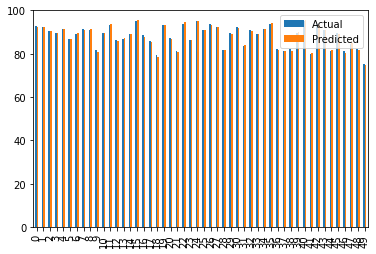

In [20]:
graph = data1.head(50)
graph.plot(kind='bar')

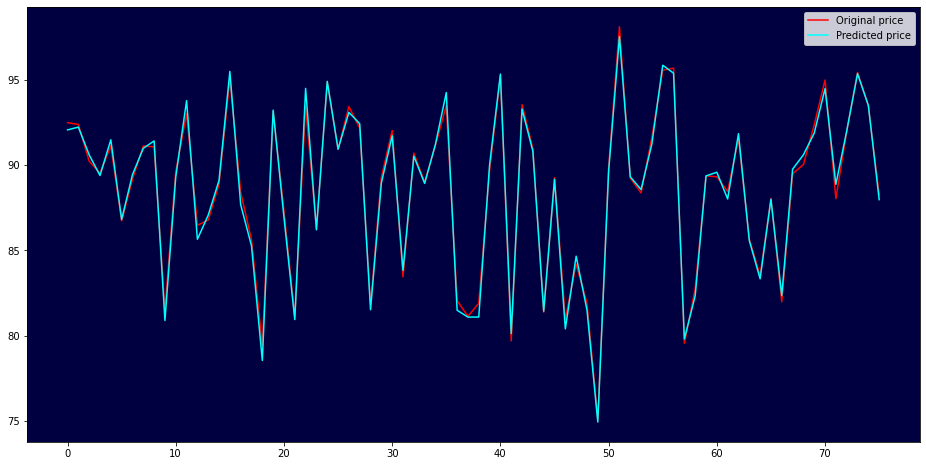

In [21]:
predictions = Model.predict(X_test)
#predictions = scaler.inverse_transform(predicted)
#y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test, color='red', label='Original price')
plt.plot(predicted, color='cyan', label='Predicted price')
plt.legend()